https://drive.google.com/drive/folders/1vsAR2_rjRZkqNX4A52cWYbbxtwCDEKdt



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [35]:
pathh = 'datasets_full/'
london_files = ['UK_international-visits','london_earnings_by_borough','london_economic_activity',
                'london_infrastructure_spending','london_sports_participation','london_taxpayer_income',
                'london_ticket_sales','london_tickets_for_sale','UK_inflation','london_underground_activity',
                'london_underground_station_info']

Rio_files = ['brazil_gdp','brazil_monthly_income','brazil_unemployment','brazil_tourism_jobs','brazil_international_arrivals']

vancouver_files = ['vancouver_turism_indicators','vancouver_employment_by_industry','vancouver_business_size',
                   'vancouver_small_business_by_region','vancouver_visits','vancouver_room_revenues_2000_2010',
                  'vancouver_room_revenues_2010_2019','region_codes']


### UK data
UK_international-visits： 2002-2019 --》tour的变化，但肯定和形式有关系，like脱欧之后tour数量肯定变少。但2012年tour应该增加很多。

可以：在奥运期间增加的visits

不可以：因为奥运 之后增加的tour，除非我能control什么 然后模拟出变化曲线

london_earnings_by_borough：identity??? 感觉这个data highly missing。。。哦哦哦average pay，可能可以用，就是每个地区average 工资变化

london_economic_activity：emm应该和london_earnings_by_borough一起看，关于人员构成

london_infrastructure_spending：奥运会花了多少钱～可以和别的地方比对一下

london_sports_participation：看london 运动量的增加

london_taxpayer_income(又是survey result):也是by region的。。和

london_earnings_by_borough可能重复？

london_ticket_sales： 票价，通过和london_infrastructure_spending比对可以算出直接支出/收入

london_tickets_for_sale：不懂但结合london_ticket_sales应该能推出支出？

UK_inflation：好久的data lol， 做比较的时候记得用

london_underground_activity：地铁人流量，07-17

london_underground_station_info：用来对应local region，对一下busy程度？要

control这些info来看人流量



In [44]:
#London datasets

"""
ind = 0

l1 = pd.read_csv('{0}london/{1}.csv'.format(pathh,london_files[ind]))
display(london_files[ind])
display(l1)
"""
for ind in range(len(london_files)):
    l1 = pd.read_csv('{0}london/{1}.csv'.format(pathh,london_files[ind]),encoding = "ISO-8859-1")
    display(london_files[ind])
    display(l1.head(3))

'UK_international-visits'

,year,quarter,market,dur_stay,mode,purpose,area,visits,spend,nights,sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,TOTAL ENGLAND,4.431616,1.013484,9.530416,6
1,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
2,2002,January-March,Belgium,1-3 nights,Air,Holiday,REST OF ENGLAND,0.859430,0.044346,2.575960,1


'london_earnings_by_borough'

,year,area_code,area,identity,pay_type,pay,confidence
0,2002,00AA,City of London,Female,Hourly,NaN,NaN
1,2003,00AA,City of London,Female,Hourly,NaN,NaN
2,2004,00AA,City of London,Female,Hourly,NaN,NaN


'london_economic_activity'

,year,area_code,area,gender,economically_active,working_age,percent,confidence
0,Jan 2005-Dec 2005,00AA,City of London,F,2400.0,3600.0,64.4,NaN
1,Jan 2006-Dec 2006,00AA,City of London,F,NaN,NaN,NaN,NaN
2,Jan 2007-Dec 2007,00AA,City of London,F,NaN,1400.0,NaN,NaN


'london_infrastructure_spending'

,expense_category,breakdown,baseline_budget,31/12/2011_forecast,31/03/2012_forecast,variance
0,Site Preparation and Infrastructure,Powerlines,282.0,286,287,1.0
1,Site Preparation and Infrastructure,Utilities,256.0,238,235,-3.0
2,Site Preparation and Infrastructure,Enabling Works,364.0,386,386,0.0


'london_sports_participation'

,year,area_code,area,sports_participation,percentage,population
0,2005-2006,A,North East,one+,0.329,687000.0
1,2007-2008,A,North East,one+,0.348,730300.0
2,2008-2009,A,North East,one+,0.354,748600.0


'london_taxpayer_income'

,year,area_code,area,population,mean_income,median_income
0,1999-2000,00AA,City of London,10000,109800,40400
1,2000-2001,00AA,City of London,10000,137000,65000
2,2001-2002,00AA,City of London,12000,92900,38300


'london_ticket_sales'

,session,price,number_sold,total_public_sold,percent_sold_to_public
0,AT001,150,16704,46425.0,73.155166
1,AT001,95,7193,46425.0,73.155166
2,AT001,65,6721,46425.0,73.155166


'london_tickets_for_sale'

,date,time,gender,session,medal_ceremony,code,AA,A,B,C,D,E,limit,venue,event
0,03-Aug,10:0013:45,M,400m Hurdles: round 1,NaN,AT001,,150,95,65,40,20,20.0,Olympic Park - Olympic Stadium,Athletics
1,03-Aug,10:0013:45,M,3000m Steeplechase: round 1,NaN,AT001,,150,95,65,40,20,20.0,Olympic Park - Olympic Stadium,Athletics
2,03-Aug,10:0013:45,M,Hammer: qualifying,NaN,AT001,,150,95,65,40,20,20.0,Olympic Park - Olympic Stadium,Athletics


'UK_inflation'

,ï»¿year,inflation,multiplier
0,2018,NaN,1.00
1,2017,0.036,1.04
2,2016,0.018,1.05


'london_underground_activity'

,year,nlc,station,area,weekday_entry,weekday_exit,saturday_entry,saturday_exit,sunday_entry,sunday_exit,annual_entry_and_exit
0,2007,500,Acton Town,Ealing,9205,8899.0,6722,6320,4427,4304,5.77
1,2007,502,Aldgate,City of London,9887,10397.0,2191,2587,1484,1772,5.57
2,2007,503,Aldgate East,Tower Hamlets,12820,12271.0,7040,6220,5505,5000,7.66


'london_underground_station_info'

,station,line,local_authority,zone,opened
0,Acton Town,District,Ealing,3,1879-07-01
1,Aldgate,Metropolitan[a],City of London,1,1876-11-18
2,Aldgate East,Hammersmith & City[d],Tower Hamlets,1,1884-10-06


### Rio data

brazil_gdp: gdp by region, 可以看影响但辐射范围 需要每个城市和办奥运会的城市的距离

brazil_monthly_income:by quarter, region, job_type, 9802 points
感觉会很有意思，可以看不同job的曲线变化 **definitely** 做EDA （可惜没有人数）

brazil_unemployment emmm 要和brazil_monthly_income结合，不知道category是什么

brazil_tourism_jobs：和旅游相关的职业数量 region 变化（注意有可能有移动）需要个翻译的package～

brazil_international_arrivals：和london比这个不分tour type，但应该比survey的准确。。。 可能可以看出来奥运吸的tour都是哪个国家？
maybe study what's specific about the tour attracted by olympics? and 钱都花在哪里，会有多久的影响







In [45]:
#Rio datasets
for ind in range(len(Rio_files)):
    l2 = pd.read_csv('{0}Rio/{1}.csv'.format(pathh,Rio_files[ind]))
    print(ind,Rio_files[ind])
    display(l2.head(3))

0 brazil_gdp


,state,region,year,value
0,Rondônia,Madeira-Guaporé,2002,2903642.81
1,Rondônia,Madeira-Guaporé,2003,3542366.88
2,Rondônia,Madeira-Guaporé,2004,4328270.64


1 brazil_monthly_income


,year,quarter,job_type,state,value
0,2012,Q1,Directors and managers,Rondônia,2232.0
1,2012,Q1,Directors and managers,Acre,3048.0
2,2012,Q1,Directors and managers,Amazonas,3787.0


2 brazil_unemployment


,year,quarter,category,state,value
0,2012,Q1,Workforce - Employed,Rondônia,701
1,2012,Q1,Workforce - Employed,Acre,286
2,2012,Q1,Workforce - Employed,Amazonas,1392


3 brazil_tourism_jobs


,year,month,region,state,job_type,jobs
0,2006,1,Centro-Oeste,Distrito Federal,Alojamento,2647
1,2006,1,Centro-Oeste,Distrito Federal,Alimentação,5026
2,2006,1,Centro-Oeste,Distrito Federal,Transporte Terrestre,5400


4 brazil_international_arrivals


,year,month,country,value
0,1989,1,África do Sul,764
1,1989,1,Alemanha,"7,214"
2,1989,1,Angola,433


In [48]:
ind = 1
l2 = pd.read_csv('{0}Rio/{1}.csv'.format(pathh,Rio_files[ind]))
print(len(l2))
l2

9801


,year,quarter,job_type,state,value
0,2012,Q1,Directors and managers,Rondônia,2232.0
1,2012,Q1,Directors and managers,Acre,3048.0
2,2012,Q1,Directors and managers,Amazonas,3787.0
3,2012,Q1,Directors and managers,Roraima,3450.0
4,2012,Q1,Directors and managers,Pará,2455.0
...,...,...,...,...,...
9796,2020,Q1,Ill-defined occupations,Rio Grande do Sul,NaN
9797,2020,Q1,Ill-defined occupations,Mato Grosso do Sul,1500.0
9798,2020,Q1,Ill-defined occupations,Mato Grosso,NaN
9799,2020,Q1,Ill-defined occupations,Goiás,1000.0


In [55]:
t1= l2.copy()
t1['time_in_order'] = t1['year'] + pd.Series([int(a[1]) * 0.1 for a in t1['quarter']])
t2 = pd.DataFrame(t1.groupby(['job_type','time_in_order'])['value'].sum()).reset_index()

Text(0.5, 1.0, 'percentage change in value for each job type in Brazil')

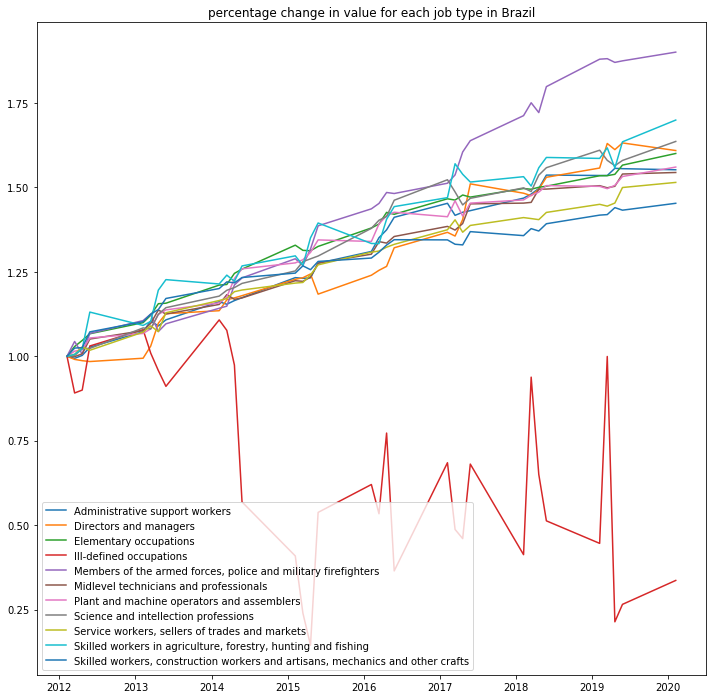

In [59]:
job_list = t2.job_type.unique()
plt.figure(figsize = (12,12))
for a in job_list:
    sub = t2[t2.job_type == a]
    plt.plot(sub.time_in_order,sub.value/sub.value.iloc[0])
plt.legend(job_list)
plt.title('percentage change in value for each job type in Brazil')

In [77]:
job_list

array(['Administrative support workers', 'Directors and managers',
       'Elementary occupations', 'Ill-defined occupations',
       'Members of the armed forces, police and military firefighters',
       'Midlevel technicians and professionals',
       'Plant and machine operators and assemblers',
       'Science and intellection professions',
       'Service workers, sellers of trades and markets',
       'Skilled workers in agriculture, forestry, hunting and fishing',
       'Skilled workers, construction workers and artisans, mechanics and other crafts'],
      dtype=object)

Text(0.5, 1.0, 'percentage change in value for each state in Brazil')

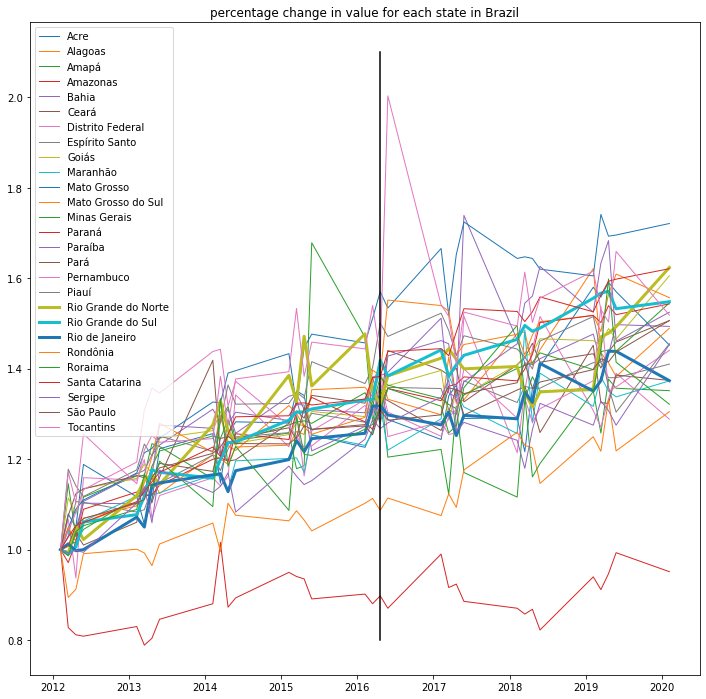

In [78]:
t1_1 = t1[t1.job_type == job_list[-1]]
t3 = pd.DataFrame(t1_1.groupby(['state','time_in_order'])['value'].sum()).reset_index()
state_list = t3.state.unique()
plt.figure(figsize = (12,12))
for a in state_list:
    sub = t3[t3.state == a]
    lw = 1
    if a[:3] == 'Rio':
        lw = 3
    plt.plot(sub.time_in_order,sub.value/sub.value.iloc[0],linewidth = lw) #
plt.legend(state_list)
plt.plot([2016.3,2016.3],[0.8,2.1],color = 'black') 
plt.title('percentage change in value for each state in Brazil')

Text(0.5, 1.0, 'percentage change in value for each state in Brazil')

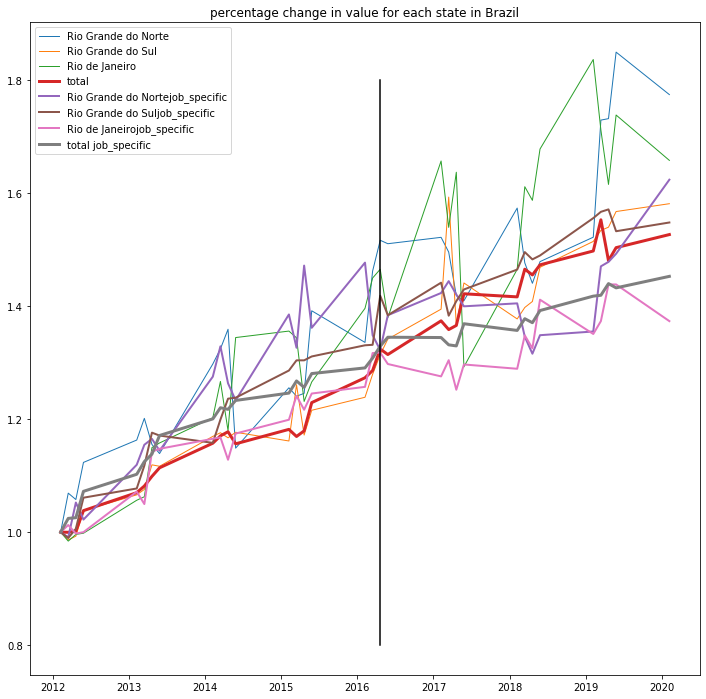

In [81]:
t3 = pd.DataFrame(t1.groupby(['state','time_in_order'])['value'].sum()).reset_index()
plt.figure(figsize = (12,12))
legend_list = []
for a in state_list:
    sub = t3[t3.state == a]
    lw = 1
    if a[:3] == 'Rio':
        #lw = 3
        plt.plot(sub.time_in_order,sub.value/sub.value.iloc[0],linewidth = lw) #
        legend_list.append(a)
t4 = pd.DataFrame(t3.groupby('time_in_order')['value'].sum()).reset_index()
plt.plot(t4.time_in_order,t4.value/t4.value.iloc[0],linewidth = 3) #
legend_list.append('total')

t3 = pd.DataFrame(t1_1.groupby(['state','time_in_order'])['value'].sum()).reset_index()
for a in state_list:
    sub = t3[t3.state == a]
    lw = 1
    if a[:3] == 'Rio':
        #lw = 3
        plt.plot(sub.time_in_order,sub.value/sub.value.iloc[0],linewidth = lw+1) #
        legend_list.append(a+'job_specific')
t4 = pd.DataFrame(t3.groupby('time_in_order')['value'].sum()).reset_index()
plt.plot(t4.time_in_order,t4.value/t4.value.iloc[0],linewidth = 3) #
legend_list.append('total job_specific')


plt.plot([2016.3,2016.3],[0.8,1.8],color = 'black') 
plt.legend(legend_list)

plt.title('percentage change in value for each state in Brazil')

### Vancouver data
vancouver_tourism_indicators: real_GDP??? consumption_taxes可以用来看消费程度？有个employment by region

vancouver_employment_by_industry，region_codes： 有人数，可以看出人数变化，如果不linear 可能intersting

vancouver_business_size，可以看出business 各个industry数量/员工数量。但unknown很烦不知道怎么处理

vancouver_small_business_by_region结合上一个？看small business的变化

vancouver_visits：直观简洁只有year，month，count，做一下EDA

vancouver_room_revenues_2000_2010/2019 emmmm这两个还不太一样。。。




In [82]:
#vancouver datasets
for ind in range(len(vancouver_files)):
    l3 = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,vancouver_files[ind]))
    print(ind,vancouver_files[ind])
    display(l3.head(3))

0 vancouver_turism_indicators


,year,revenue,GDP,real_GDP,implicit_price_index,employment,wages_and_salaries,consumption_taxes,employment_vcm,employment_vi,employment_to,employment_nbc,employment_bcr,employment_ccc
0,2000,"9,350","4,679","5,085",91.4,96.7,"2,801",855,"60,600","15,300","9,500","5,400","3,900","2,000"
1,2001,"9,448","4,857","5,102",94.6,104.2,"2,968",861,"67,300","15,700","9,300","5,400","4,500","2,100"
2,2002,"9,754","4,931","5,147",95.2,104.2,"2,927",943,"64,800","17,700","10,400","5,300","4,200","1,800"


1 vancouver_employment_by_industry


,year,industry_code,value
0,1987.0,0,1377700.0
1,1987.0,"11,21,22,23,31,32,33",333800.0
2,1987.0,"1100 1129, 1151 1152",31700.0


2 vancouver_business_size


,year,region_code,business_type,unknown,one_to_4,five_to_9,ten_to_19,twenty_to_49,fifty_to_199,two_hundred_plus
0,1999,DR01,"Agric., Forestry, Fishing & Hunt","1,227",954,219,142,99,44.0,7.0
1,1999,DR01,Mining & Oil & Gas Extract.,59,40,7,3,NaN,4.0,1.0
2,1999,DR01,Utilities,13,7,4,4,2,3.0,1.0


3 vancouver_small_business_by_region


,year,region_code,value
0,2007,DR01,"79,200"
1,2008,DR01,"80,300"
2,2009,DR01,"82,400"


4 vancouver_visits


,year,month,value
0,1994,1,320101
1,1994,2,315660
2,1994,3,429018


5 vancouver_room_revenues_2000_2010


,year,month,region_code,acc_type,revenue,properties,rooms
0,2000,1,DR01,TOT,7582000.0,345,"14,092"
1,2000,2,DR01,TOT,10090000.0,374,"14,335"
2,2000,3,DR01,TOT,13198000.0,401,"14,819"


6 vancouver_room_revenues_2010_2019


,year,month,region_code,region_name,revenue
0,2010.0,1.0,UC39,Campbell River,NaN
1,2010.0,2.0,UC39,Campbell River,NaN
2,2010.0,3.0,UC39,Campbell River,NaN


7 region_codes


,region_code,region_name,Composition,Description
0,DR01,Vancouver Island/Coast,"RD 17, 19, 21, 23, 25, 43, 45",NaN
1,DR02,Mainland/Southwest,"RD 09, 15, 29, 31",NaN
2,DR03,Thompson/Okanagan,"RD 07, 33, 35, 37, 39",NaN


In [84]:
l3_0 = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,vancouver_files[-1]))
print(len(l3))
l3_0

4653


,region_code,region_name,Composition,Description
0,DR01,Vancouver Island/Coast,"RD 17, 19, 21, 23, 25, 43, 45",NaN
1,DR02,Mainland/Southwest,"RD 09, 15, 29, 31",NaN
2,DR03,Thompson/Okanagan,"RD 07, 33, 35, 37, 39",NaN
3,DR04,Kootenay,"RD 01, 03, 05",NaN
4,DR05,Cariboo,"RD 41, 53",NaN
...,...,...,...,...
69,UC37,Cache Creek,NaN,Village of Cache Creek
70,UC38,Valemount/Robson Valley,NaN,"Village of Valemount, properties reporting wit..."
71,UC39,Campbell River,NaN,City of Campbell River
72,UC40,Tofino,NaN,District Municipality of Tofino


In [87]:
ind = 1
l3 = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,vancouver_files[ind]))
print(len(l3))
l3['Composition'] = 'RD ' + l3['industry_code']
l3 = l3.merge(l3_0[['region_name','Composition']],how = 'left',left_on = 'Composition',right_on = 'Composition')

4653


In [92]:
#l3_0.Composition.unique()

In [93]:
#l3.industry_code.unique()


In [ ]:
t2 = pd.DataFrame(t1.groupby(['industry_code','time_in_order'])['value'].sum()).reset_index()
job_list = t2.job_type.unique()
plt.figure(figsize = (12,12))
for a in job_list:
    sub = t2[t2.job_type == a]
    plt.plot(sub.time_in_order,sub.value/sub.value.iloc[0])
plt.legend(job_list)
plt.title('percentage change in value for each job type in Brazil')

In [101]:
Vancouver_visits['month'][0]

1

In [105]:
Vancouver_visits = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,'Vancouver_visits'))
Vancouver_visits['time_in_order'] = Vancouver_visits['year'] + pd.Series([int(a)/13 for a in Vancouver_visits['month']])


In [106]:
Vancouver_visits

,year,month,value,time_in_order
0,1994,1,320101,1994.076923
1,1994,2,315660,1994.153846
2,1994,3,429018,1994.230769
3,1994,4,443933,1994.307692
4,1994,5,550832,1994.384615
...,...,...,...,...
295,2018,8,1492987,2018.615385
296,2018,9,985075,2018.692308
297,2018,10,797400,2018.769231
298,2018,11,679496,2018.846154


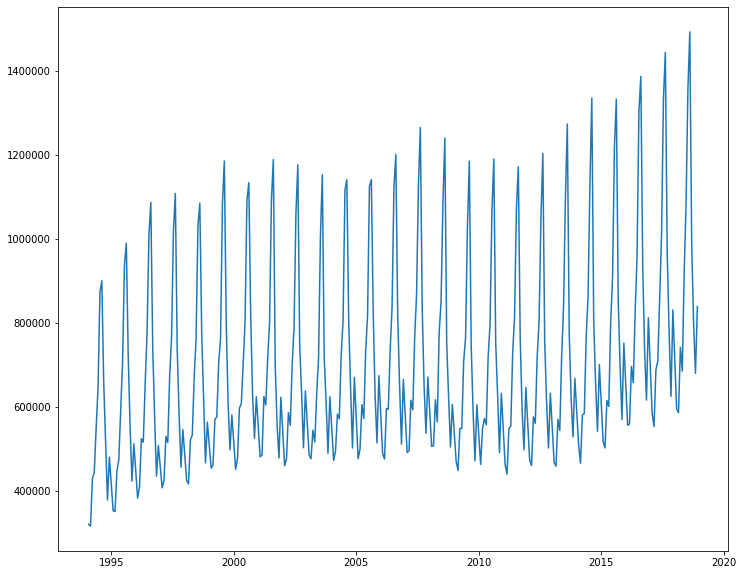

In [107]:
plt.figure(figsize = (12,10))
plt.plot(Vancouver_visits.time_in_order,Vancouver_visits.value)

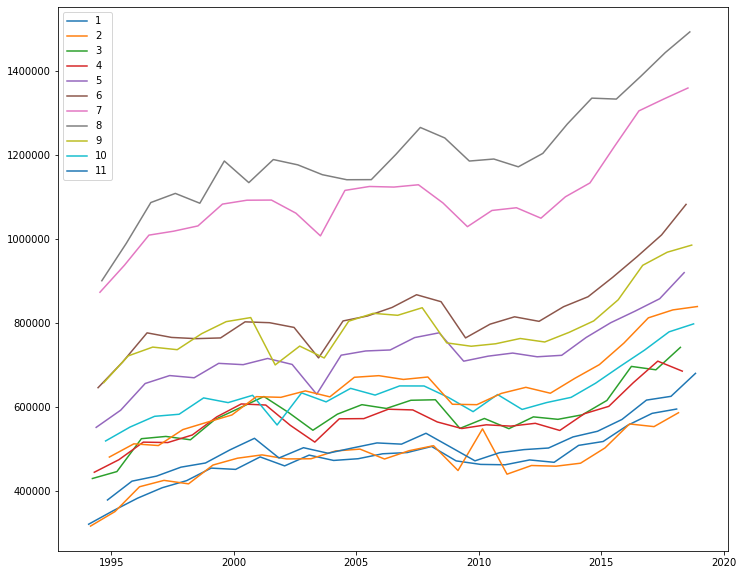

In [118]:
plt.figure(figsize = (12,10))
for i in range(12):
    cond = Vancouver_visits.month == i+1
    plt.plot(Vancouver_visits[cond].time_in_order,Vancouver_visits[cond].value)
    
plt.legend(list(np.arange(1,12)))